<a href="https://colab.research.google.com/github/silwalprabin/data-mining-and-machine-learning/blob/main/W5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ID3 Algorithm Using Scikit-Learn: Real-World Use Cases Demonstration

## Overview of ID3 with Scikit-Learn
ID3 builds decision trees using entropy and information gain for categorical data. Scikit-learn's `DecisionTreeClassifier` uses CART by default (Gini impurity), but we can approximate ID3 by setting `criterion='entropy'` for information gain and `splitter='best'` for selecting splits.

Key settings for ID3-like behavior:
- `criterion='entropy'`: Uses entropy instead of Gini.
- Handles categorical data via encoding (we'll use LabelEncoder).
- Multi-way splits for categorical features.

Note: Scikit-learn doesn't implement ID3 exactly but closely mimics it with these params.

### Agenda
1. **Introduction to ID3 with Sklearn**
2. **Use Case 1: Outdoor Activity Planning - Attributes, Data, Model, Viz
3. **Use Case 2: Credit Approval - Attributes, Data, Model, Viz
4. **Model Evaluation**
5. **Code Explanation**
6. **Conclusion and Q&A**

We'll use scikit-learn for efficient implementation!

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from pprint import pprint

print('Libraries imported successfully!')

Libraries imported successfully!


## Use Case 1: Outdoor Activity Planning (e.g., Playing Tennis)

Deciding whether to play tennis based on weather.

### Detailed Attribute Explanation
- **Outlook** (Categorical: Sunny, Overcast, Rain): Sky condition. Sunny often correlates with 'No' due to heat, Overcast with 'Yes' (ideal), Rain with 'No' unless other factors help.
- **Temperature** (Categorical: Hot, Mild, Cool): Air temperature level. Hot may deter play, Mild/Cool are more favorable.
- **Humidity** (Categorical: High, Normal): Moisture level. High humidity makes play uncomfortable ('No'), Normal is better.
- **Wind** (Categorical: Weak, Strong): Wind strength. Strong winds can disrupt play ('No'), Weak is preferable.
- **Target: Play Tennis** (Categorical: Yes, No): Whether tennis is played.

Dataset: 14 historical days.

In [2]:
# Hardcode the Play Tennis dataset
data = {
    'Day': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
df = df.drop('Day', axis=1)  # Drop index column
print('Dataset shape:', df.shape)
print('\nFirst 5 rows:')
df.head()

Dataset shape: (14, 5)

First 5 rows:


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
# Preprocess: Encode categorical features
le = LabelEncoder()
for col in df.columns[:-1]:  # Exclude target
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

# Since small data, no split; use full for demo
print('Features shape:', X.shape)

Features shape: (14, 4)


In [4]:
# Build ID3-like tree with sklearn
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X, y)

# Text representation
tree_text = export_text(dt, feature_names=list(X.columns))
print('Tree Structure:')
print(tree_text)

Tree Structure:
|--- Outlook <= 0.50
|   |--- class: Yes
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: Yes
|   |   |--- Outlook >  1.50
|   |   |   |--- class: No
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: No
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: Yes
|   |   |--- Wind >  0.50
|   |   |   |--- class: Yes



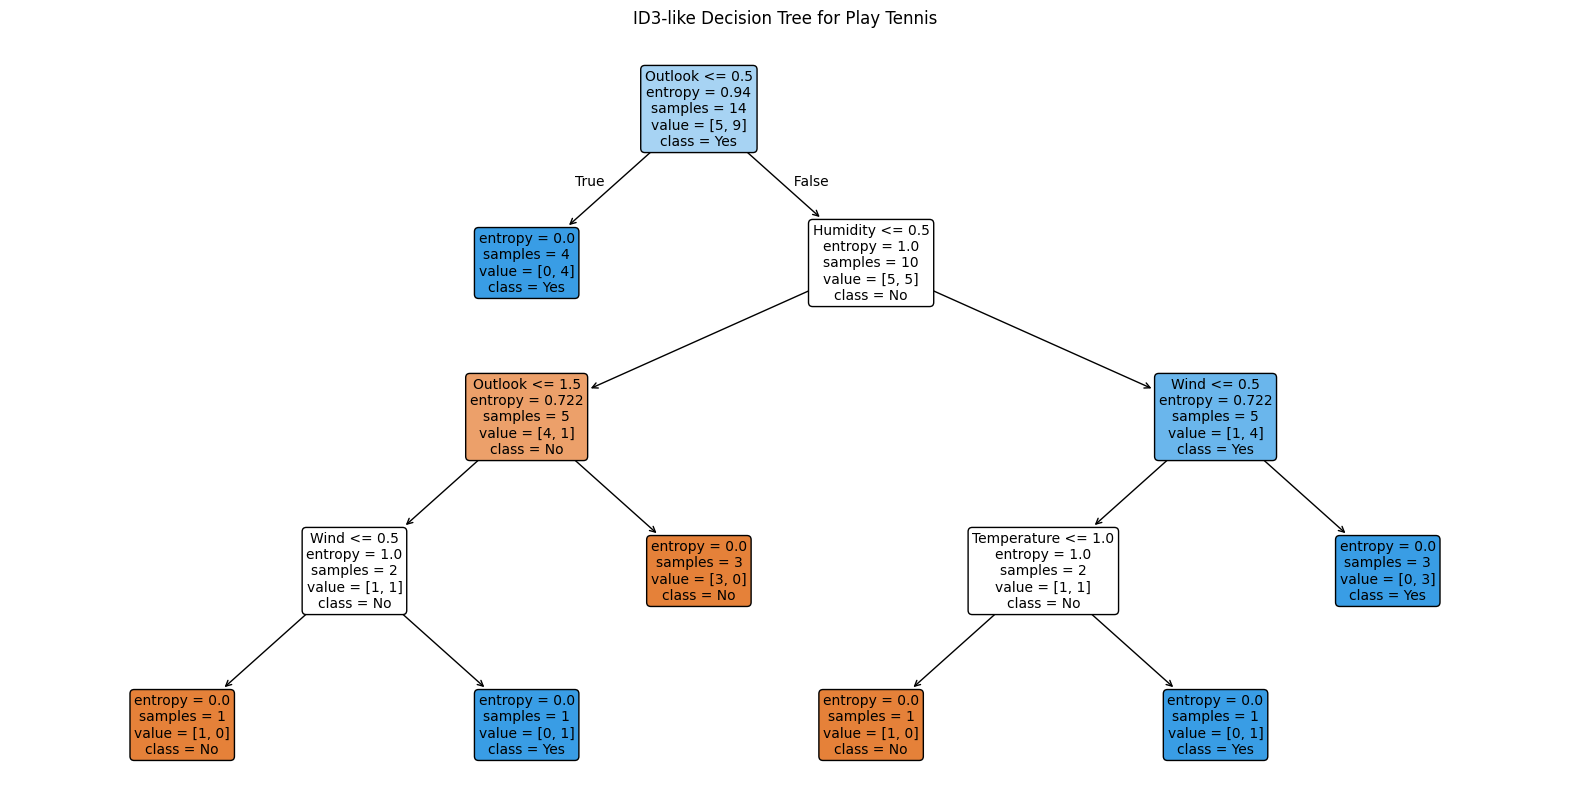

In [5]:
# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title('ID3-like Decision Tree for Play Tennis')
plt.show()

In [6]:
# Example prediction (encode input)
test_instance = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['Normal'],
    'Wind': ['Weak']
})
for col in test_instance.columns:
    test_instance[col] = le.fit_transform(test_instance[col])  # Re-encode (demo only)

prediction = dt.predict(test_instance)
print(f'Prediction for test instance: {prediction[0]}')

Prediction for test instance: Yes


## Use Case 2: Credit Approval Decision

Classifying loan applicants for approval.

### Detailed Attribute Explanation
- **Income** (Categorical: Low, Medium, High): Annual income bracket. Low increases rejection risk; High favors approval.
- **Employment** (Categorical: Full-time, Part-time, Unemployed): Job stability. Full-time is positive; Unemployed often rejects.
- **Credit History** (Categorical: Good, Bad): Past repayment record. Good history strongly predicts approval; Bad leads to rejection.
- **Target: Approve** (Categorical: Yes, No): Loan approval decision.

Dataset: 8 synthetic applicants.

In [7]:
# Hardcode Credit Approval dataset
data_credit = {
    'Applicant': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Income': ['Low', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low'],
    'Employment': ['Part-time', 'Full-time', 'Full-time', 'Unemployed', 'Full-time', 'Part-time', 'Unemployed', 'Full-time'],
    'Credit_History': ['Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad'],
    'Approve': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df_credit = pd.DataFrame(data_credit)
df_credit = df_credit.drop('Applicant', axis=1)
print('Dataset shape:', df_credit.shape)
print('\nFirst 5 rows:')
df_credit.head()

Dataset shape: (8, 4)

First 5 rows:


,Income,Employment,Credit_History,Approve
0,Low,Part-time,Bad,No
1,High,Full-time,Good,Yes
2,Medium,Full-time,Good,Yes
3,Low,Unemployed,Bad,No
4,High,Full-time,Good,Yes


In [8]:
# Preprocess: Encode
le_credit = LabelEncoder()
for col in df_credit.columns[:-1]:
    df_credit[col] = le_credit.fit_transform(df_credit[col])

X_credit = df_credit.drop('Approve', axis=1)
y_credit = df_credit['Approve']
print('Features shape:', X_credit.shape)

Features shape: (8, 3)


In [9]:
# Build ID3-like tree
dt_credit = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_credit.fit(X_credit, y_credit)

tree_text_credit = export_text(dt_credit, feature_names=list(X_credit.columns))
print('Tree Structure:')
print(tree_text_credit)

Tree Structure:
|--- Credit_History <= 0.50
|   |--- class: No
|--- Credit_History >  0.50
|   |--- class: Yes



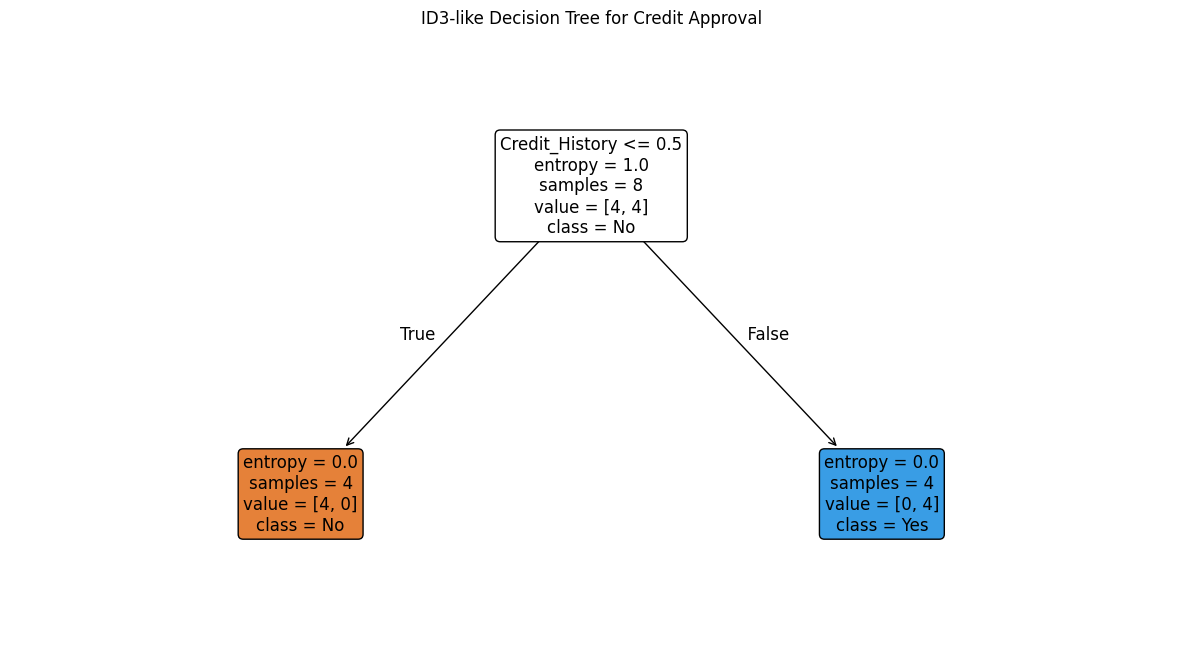

In [10]:
# Visualize
plt.figure(figsize=(15, 8))
plot_tree(dt_credit, feature_names=list(X_credit.columns), class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=12)
plt.title('ID3-like Decision Tree for Credit Approval')
plt.show()

In [11]:
# Example prediction
test_instance_credit = pd.DataFrame({
    'Income': ['Medium'],
    'Employment': ['Full-time'],
    'Credit_History': ['Good']
})
for col in test_instance_credit.columns:
    test_instance_credit[col] = le_credit.fit_transform(test_instance_credit[col])

prediction_credit = dt_credit.predict(test_instance_credit)
print(f'Prediction for test instance: {prediction_credit[0]}')

Prediction for test instance: No


## Model Evaluation

In [12]:
# Accuracy on full data (small datasets)
y_pred1 = dt.predict(X)
acc1 = accuracy_score(y, y_pred1)
print(f'Accuracy on Play Tennis: {acc1:.2f}')

Accuracy on Play Tennis: 1.00


In [13]:
y_pred2 = dt_credit.predict(X_credit)
acc2 = accuracy_score(y_credit, y_pred2)
print(f'Accuracy on Credit Approval: {acc2:.2f}')

Accuracy on Credit Approval: 1.00


## Code Explanation

1. **Imports**: Sklearn for DecisionTreeClassifier, plot_tree, export_text; LabelEncoder for categoricals.

2. **Preprocessing**: Encode categorical features to integers (required for sklearn trees).

3. **Model Building**: `DecisionTreeClassifier(criterion='entropy')` - entropy mimics ID3's information gain.

4. **Text Export**: `export_text()` prints tree rules in readable format.

5. **Visualization**: `plot_tree()` draws the tree with features, splits, and class distributions.

6. **Prediction**: `predict()` on encoded input.

7. **Evaluation**: `accuracy_score()` on predictions.

This approach leverages sklearn's efficiency while approximating ID3 behavior.

## Summary

We've used scikit-learn to build ID3-like trees for two use cases:
- **Outdoor Planning**: Weather drives decisions.
- **Credit Approval**: Profile assesses risk.

Benefits: Scalable, integrated with ML pipelines. Limitations: Exact ID3 needs from-scratch for pure entropy gain.

### Next Steps
- Tune params (e.g., max_depth).
- Use larger datasets.
- Compare with Random Forest.


Max Depth: 1, Accuracy: 0.64
Max Depth: 2, Accuracy: 0.86
Max Depth: 3, Accuracy: 0.86
Max Depth: 4, Accuracy: 1.00
Max Depth: 5, Accuracy: 1.00


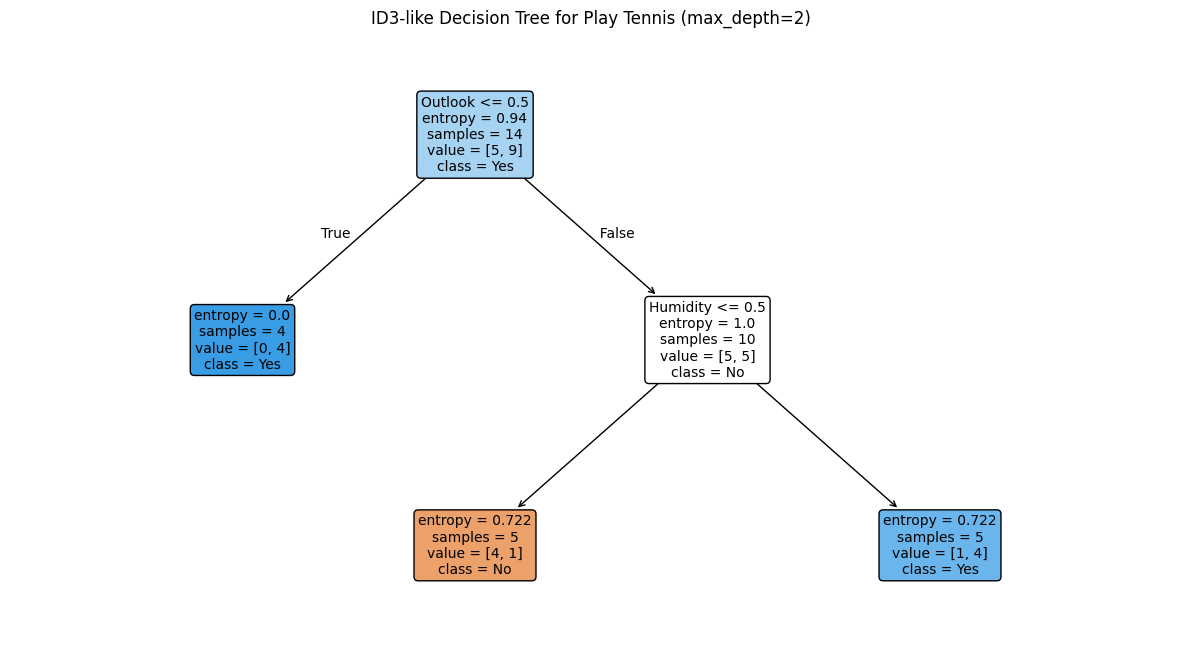

In [15]:
# Next Steps: Tune parameters (e.g., max_depth)

# We'll explore the impact of max_depth on the Play Tennis model

# Create a list of max_depth values to test
max_depths = [1, 2, 3, 4, 5] # Or None for unlimited depth

# Train and evaluate models with different max_depths
for depth in max_depths:
    dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_tuned.fit(X, y)
    y_pred_tuned = dt_tuned.predict(X)
    acc_tuned = accuracy_score(y, y_pred_tuned)
    print(f'Max Depth: {depth}, Accuracy: {acc_tuned:.2f}')

# You can visualize a specific tuned tree, for example, max_depth=2
plt.figure(figsize=(15, 8))
plot_tree(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42).fit(X, y),
          feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title('ID3-like Decision Tree for Play Tennis (max_depth=2)')
plt.show()

In [18]:
# Next Steps: Compare with Random Forest

from sklearn.ensemble import RandomForestClassifier

# Build and train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Evaluate the Random Forest model on the full data
y_pred_rf = rf_model.predict(X)
acc_rf = accuracy_score(y, y_pred_rf)

print(f'Accuracy of Random Forest on Play Tennis: {acc_rf:.2f}')

# Compare predictions
print("\nRandom Forest Predictions:")
print(y_pred_rf)
print("\nID3-like Tree Predictions:")
print(y_pred1) # y_pred1 was generated in the accuracy-use1 cell

Accuracy of Random Forest on Play Tennis: 1.00

Random Forest Predictions:
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']

ID3-like Tree Predictions:
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


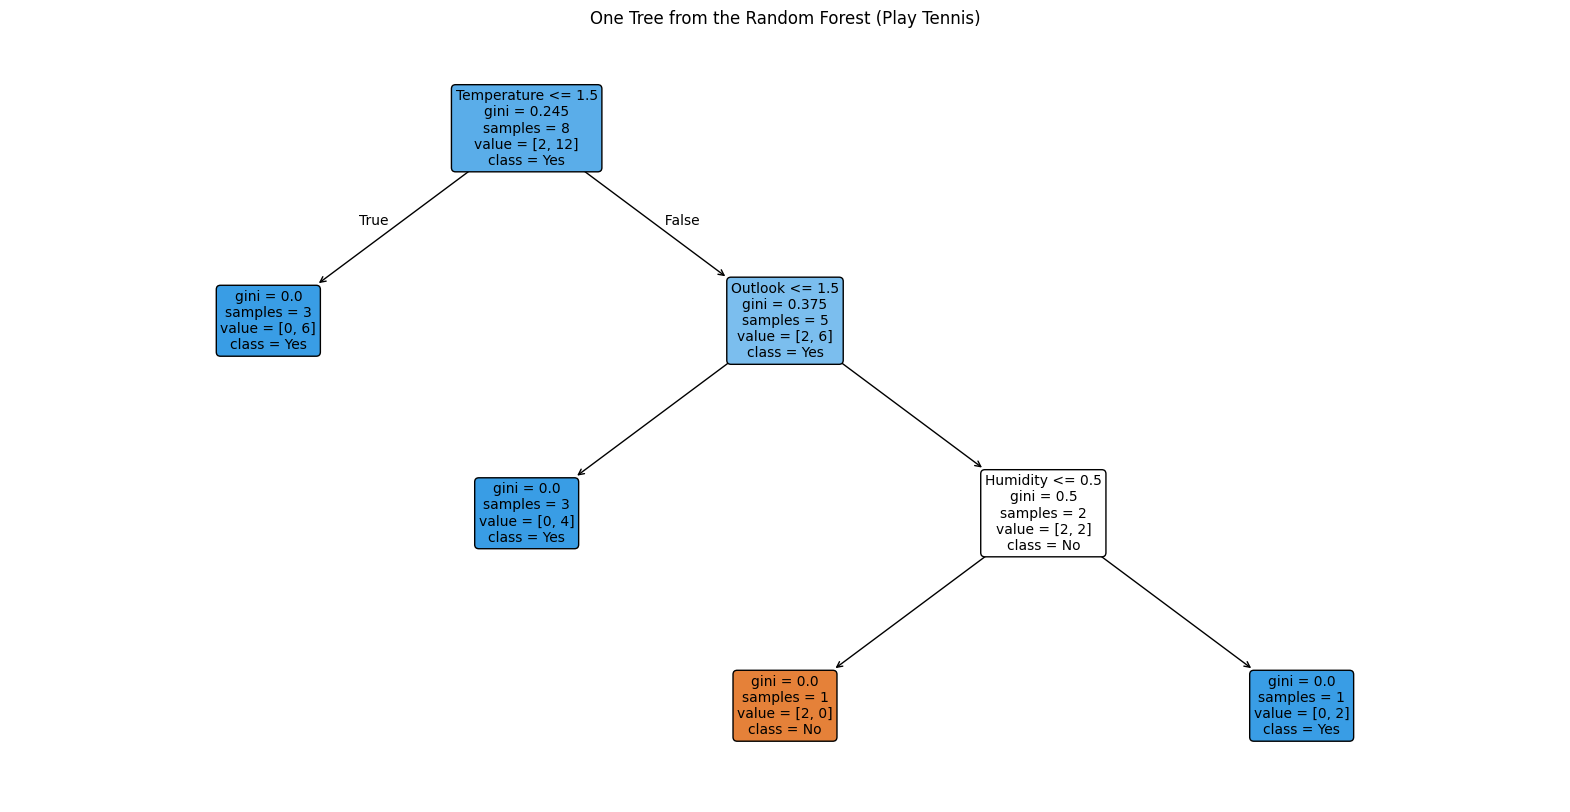

In [23]:
# Visualize one tree from the Random Forest
# You can change the index [0] to visualize a different tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title('One Tree from the Random Forest (Play Tennis)')
plt.show()

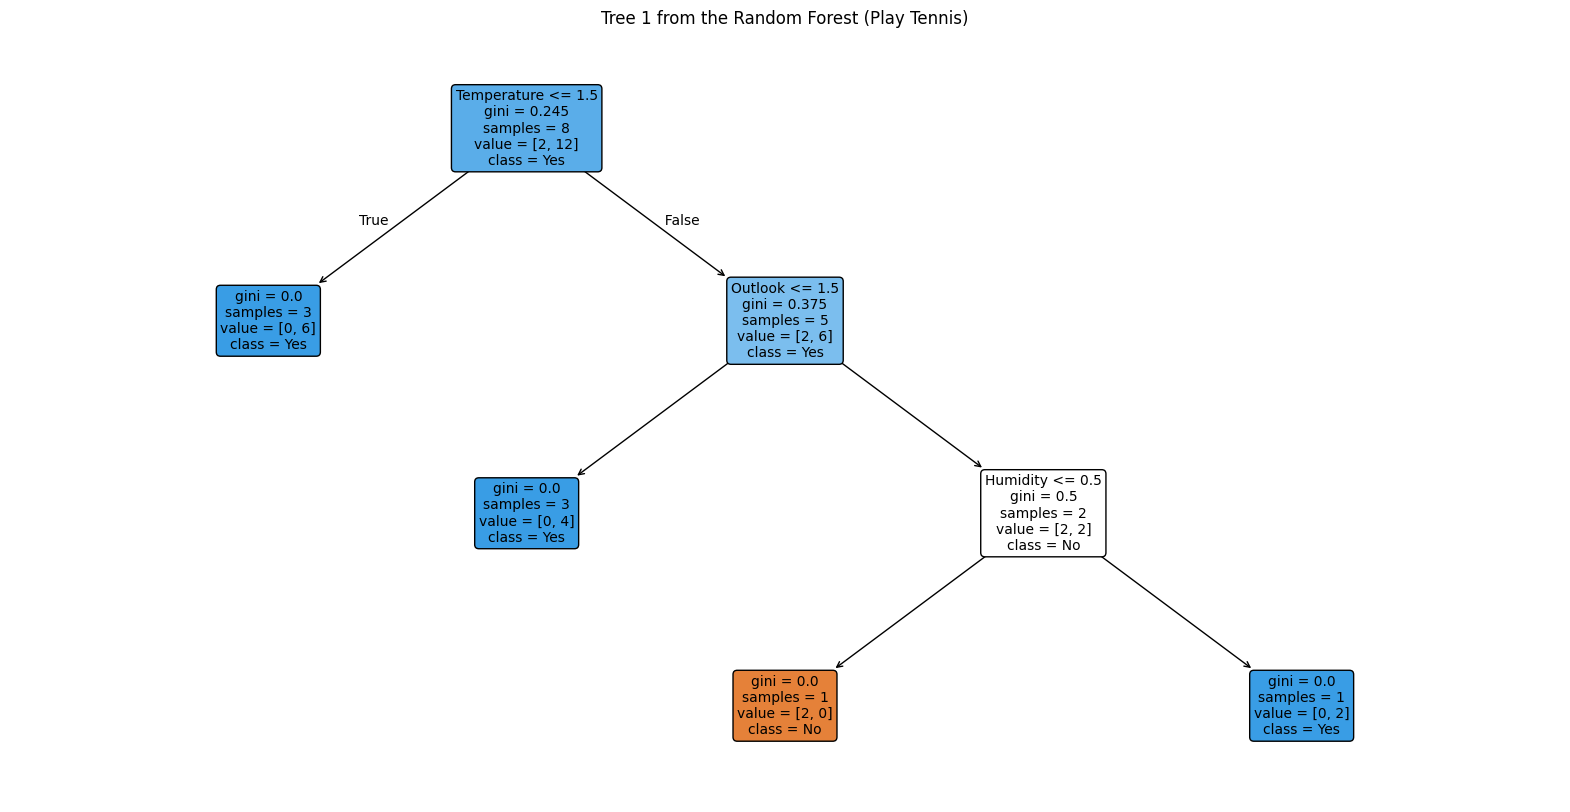

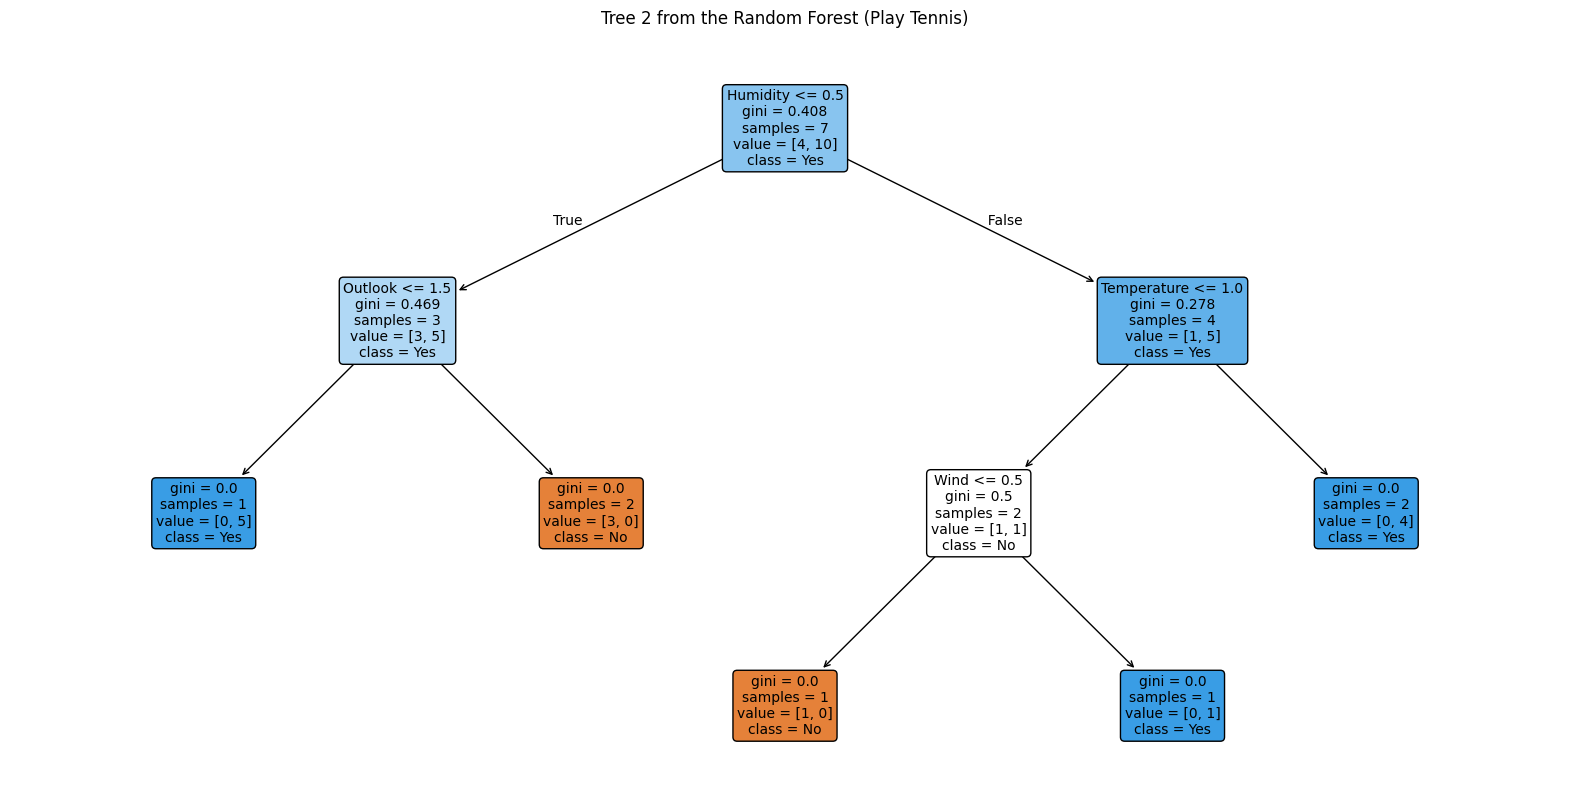

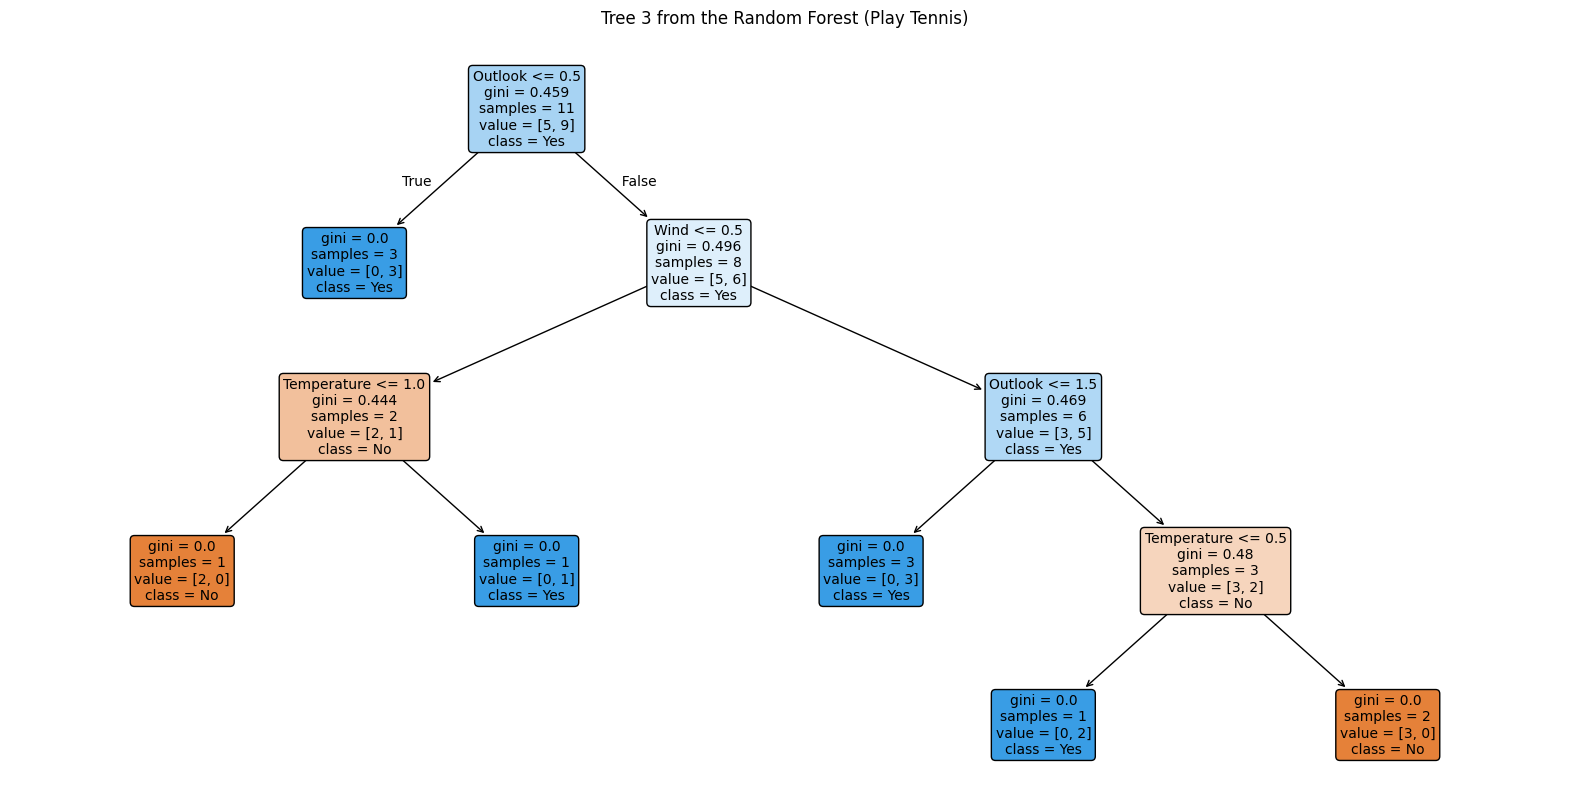

In [24]:
# Visualize multiple trees from the Random Forest
num_trees_to_visualize = 3 # You can change this number

for i in range(num_trees_to_visualize):
    if i < len(rf_model.estimators_):
        plt.figure(figsize=(20, 10))
        plot_tree(rf_model.estimators_[i], feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
        plt.title(f'Tree {i+1} from the Random Forest (Play Tennis)')
        plt.show()
    else:
        print(f"Random Forest only has {len(rf_model.estimators_)} trees. Cannot visualize tree {i+1}.")

Boosting

Bagging

Stacking

In [25]:
# How To Implement Boosting In Python Example

# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifier (decision tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Define bagging classifier with base classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [27]:
# How To Implement Bagging In Python Example
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifier (decision tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Define bagging classifier with base classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [26]:
# How To Implement Stacking In Python Example

# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define meta classifier
meta_classifier = LogisticRegression(random_state=42)

# Define stacking classifier with base and meta classifiers
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### **Bonus Example**

# Decision Tree Algorithm: Real-World Use Case - Predicting Heart Disease


## Overview
In this notebook, we'll explore the Decision Tree algorithm using a real-world dataset: the **UCI Heart Disease Dataset**. This dataset is used to predict the presence of heart disease in patients based on various medical attributes.

### Agenda
1. **Introduction to Decision Trees**
2. **Data Loading and Exploration**
3. **Data Preprocessing**
4. **Building and Training the Model**
5. **Model Evaluation**
6. **Visualizing the Decision Tree**
7. **Hyperparameter Tuning**


## Step 1: Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print('Libraries imported successfully!')

Libraries imported successfully!


## Step 2: Load the Dataset

We'll use the UCI Heart Disease dataset. For Colab, we'll load it directly from a URL.

### Dataset Attributes Explanation

Here's a brief explanation of the attributes in the dataset:

*   **age**: Age in years
*   **sex**: Sex (1 = male; 0 = female)
*   **cp**: Chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
*   **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
*   **chol**: Serum cholesterol in mg/dl
*   **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   **restecg**: Resting electrocardiographic results (0 = normal; 1 = ST-T wave abnormality; 2 = left ventricular hypertrophy)
*   **thalach**: Maximum heart rate achieved
*   **exang**: Exercise induced angina (1 = yes; 0 = no)
*   **oldpeak**: ST depression induced by exercise relative to rest
*   **slope**: The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
*   **ca**: Number of major vessels (0-3) colored by fluoroscopy
*   **thal**: Thallium stress test result (3 = normal; 6 = fixed defect; 7 = reversible defect)
*   **target**: Diagnosis of heart disease (0 = no disease; 1-4 = presence of disease). We will later convert this to a binary target (0 or 1).

In [ ]:
# Load the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names)
df = df.replace('?', np.nan)  # Replace '?' with NaN
df = df.dropna()  # Drop rows with missing values

print('Dataset shape:', df.shape)
print('\nFirst 5 rows:')
df.head()

Dataset shape: (297, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Step 3: Exploratory Data Analysis (EDA)

Let's understand our data: distributions, correlations, and target variable.

In [ ]:
# Basic info
print('Dataset Info:')
df.info()

print('\nTarget Distribution:')
print(df['target'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB

Target Distribution:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


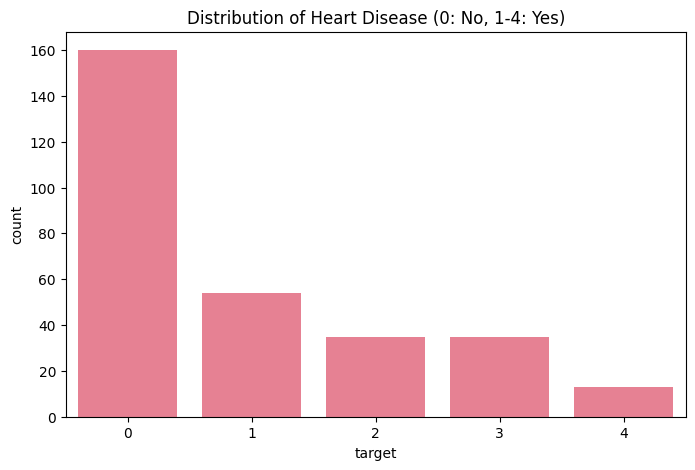

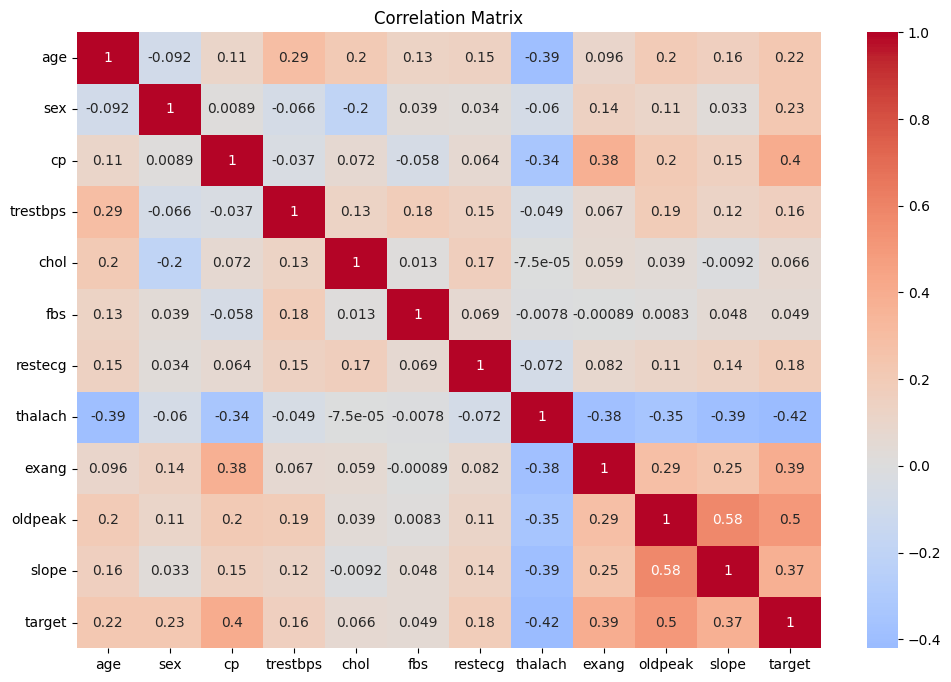

In [ ]:
# Visualize target distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease (0: No, 1-4: Yes)')
plt.show()

# Correlation heatmap (select numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Step 4: Data Preprocessing

Handle categorical variables and prepare features and target.

In [ ]:
# Binary target: 0 (no disease) vs 1 (disease)
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Encode categorical variables if any (in this dataset, most are numeric, but ca and thal may need handling)
le = LabelEncoder()
X['ca'] = le.fit_transform(X['ca'].astype(str))
X['thal'] = le.fit_transform(X['thal'].astype(str))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Train set shape: (237, 13)
Test set shape: (60, 13)


## Step 5: Build and Train Decision Tree Model

In [ ]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

print('Model trained successfully!')

Model trained successfully!


## Step 6: Model Evaluation

Assess accuracy, precision, recall, and confusion matrix.

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



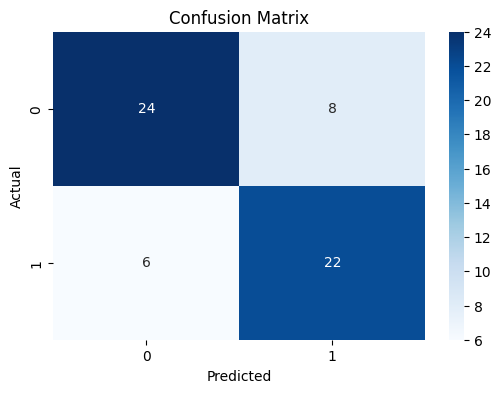

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Step 7: Visualize the Decision Tree

Plot the tree to understand the decision-making process.

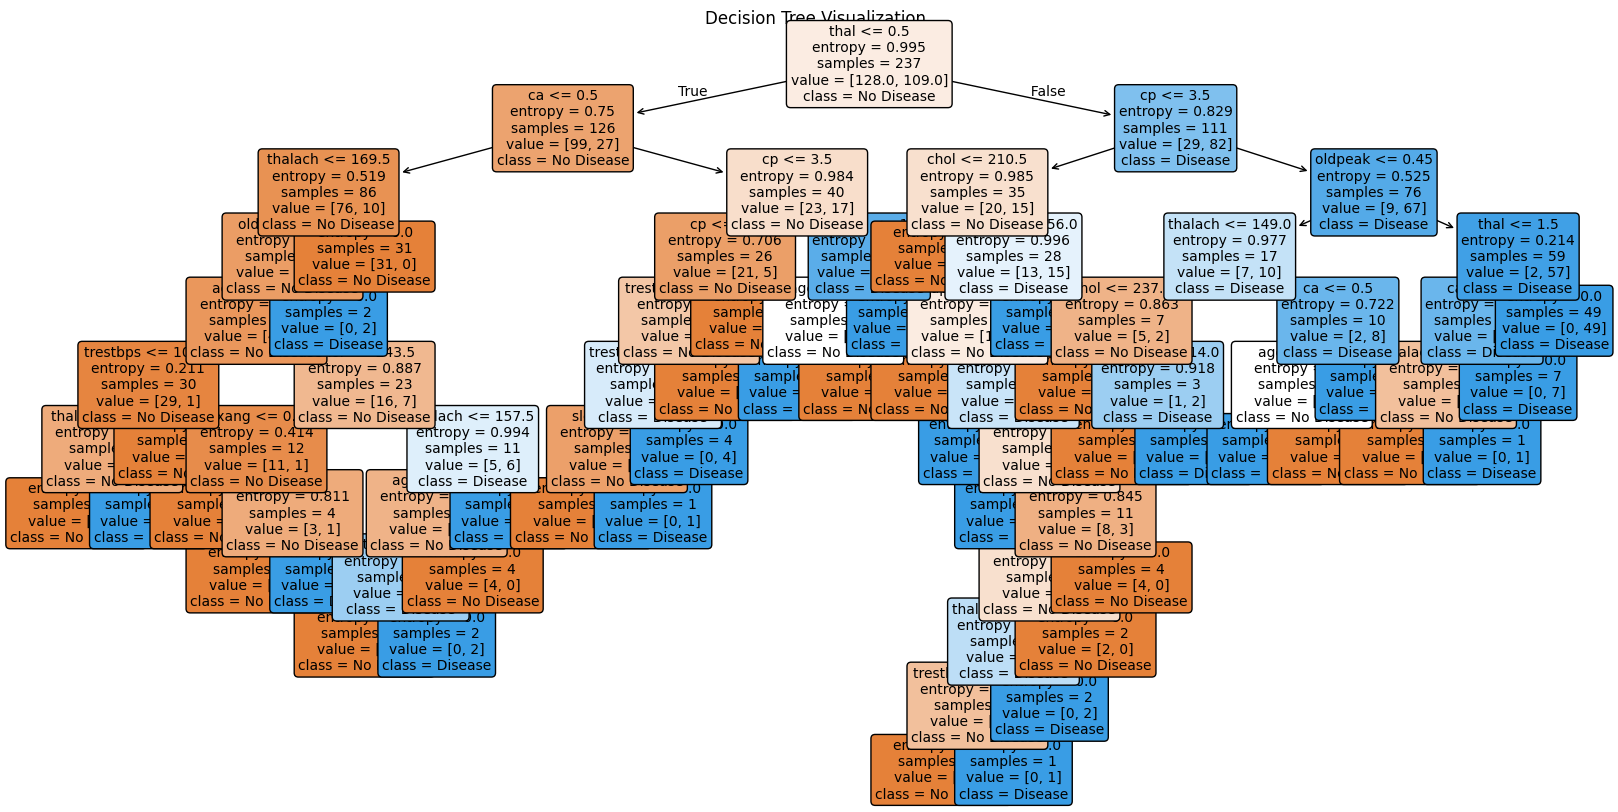

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

## Step 8: Hyperparameter Tuning

Use GridSearchCV to find the best parameters for max_depth and min_samples_split.

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best CV Score:', grid_search.best_score_)

# Evaluate best model on test set
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Test Accuracy: {accuracy_best:.2f}')

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best CV Score: 0.8011524822695035
Best Model Test Accuracy: 0.80
